In [2]:
import numpy as np
import pandas as pd
#from matplotlib import pyplot as plt
import seaborn as sns

import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
location = "diamonds.csv"
df = pd.read_csv(location)
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
df=df.drop('Unnamed: 0', axis=1)
df.head()



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
df.shape

(53940, 10)

In [216]:
df.tail(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
def score_to_numeric(x):
    if x=='Fair':
        return 1
    if x=='Good':
        return 2
    if x=='Very Good':
        return 3
    if x=='Premium':
        return 4
    if x=='Ideal':
        return 5
    
df['cut_val'] = df['cut'].apply(score_to_numeric)
df.tail(20)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_val
53920,0.70,Very Good,E,VS2,62.4,60.0,2755,5.57,5.61,3.49,3
53921,0.70,Very Good,E,VS2,62.8,60.0,2755,5.59,5.65,3.53,3
53922,0.70,Very Good,D,VS1,63.1,59.0,2755,5.67,5.58,3.55,3
53923,0.73,Ideal,I,VS2,61.3,56.0,2756,5.80,5.84,3.57,5
53924,0.73,Ideal,I,VS2,61.6,55.0,2756,5.82,5.84,3.59,5
53925,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67,5
53926,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54,5
53927,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54,2
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68,4
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53,5


In [138]:
# df=df.drop('quality', axis=1)
# df.head()

ValueError: labels ['quality'] not contained in axis

In [6]:
def score_to_numeric(y):
    if y=='J':
        return 1
    if y=='I':
        return 2
    if y=='H':
        return 3
    if y=='G':
        return 4
    if y=='F':
        return 5
    if y=='E':
        return 6
    if y=='D':
        return 7
    
df['color_val'] = df['color'].apply(score_to_numeric)
# df.tail(20)

In [7]:
def score_to_numeric(z):
    if z=='I3':
        return 1
    if z=='I2':
        return 2
    if z=='I1':
        return 3
    if z=='SI2':
        return 4
    if z=='SI1':
        return 5
    if z=='VS2':
        return 6
    if z=='VS1':
        return 7
    if z=='VVS2':
        return 8
    if z=='VVS1':
        return 9
    if z=='IF':
        return 10
    if z=="FL":
        return 11
    
    
df['clarity_val'] = df['clarity'].apply(score_to_numeric)
# df.tail(200)

In [142]:
df.loc[(df['clarity_val'] >= 5) & (df['clarity_val'] <=11) & (df['cut_val'] >=4) & (df['cut_val'] <=5) & (df['color_val'] >=6) & (df['color_val'] <=7)]
#df.loc[(df['cut_val'] >=4) & (df['cut_val'] <=5)]
#df.loc[(df['color_val'] >=6) & (df['color_val'] <=7)]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_val,color_val,clarity_val
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,5
53,0.22,Premium,E,VS2,61.6,58.0,404,3.93,3.89,2.41,4,6,6
54,0.22,Premium,D,VS2,59.3,62.0,404,3.91,3.88,2.31,4,7,6
61,0.30,Premium,D,SI1,62.6,59.0,552,4.23,4.27,2.66,4,7,5
62,0.30,Ideal,D,SI1,62.5,57.0,552,4.29,4.32,2.69,5,7,5
63,0.30,Ideal,D,SI1,62.1,56.0,552,4.30,4.33,2.68,5,7,5
69,0.24,Premium,E,VVS1,60.7,58.0,553,4.01,4.03,2.44,4,6,9
82,0.26,Ideal,E,VVS2,62.9,58.0,554,4.02,4.06,2.54,5,6,8
90,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57,5,6,5
101,0.75,Premium,E,SI1,59.9,54.0,2760,6.00,5.96,3.58,4,6,5


In [121]:
#df_clarity_new=df.loc[df['clarity_val'] <= 5]
#df_clarity_new.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,cut_val,color_val,clarity_val
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,6,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,3,3,1
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73,2,1,1


In [135]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cut_val', 'color_val', 'clarity_val'],
      dtype='object')

In [136]:
df.dtypes

carat          float64
cut             object
color           object
clarity         object
depth          float64
table          float64
price            int64
x              float64
y              float64
z              float64
cut_val          int64
color_val        int64
clarity_val      int64
dtype: object

In [137]:
df.count()

carat          53940
cut            53940
color          53940
clarity        53940
depth          53940
table          53940
price          53940
x              53940
y              53940
z              53940
cut_val        53940
color_val      53940
clarity_val    53940
dtype: int64

In [21]:
df['price'].max()

18823

In [13]:
df['price'].min()

326

In [14]:
df['price'].sum()

212135217

In [15]:
df['price'].mean()

3932.799721913237

In [16]:
df['price'].median()

2401.0

In [17]:
df['price'].mode()

0    605
dtype: int64

In [18]:
df['price'].value_counts()

605      132
802      127
625      126
828      125
776      124
789      121
698      121
544      120
666      114
552      113
720      107
596      107
645      104
526      101
675       99
844       98
1013      98
765       95
684       91
561       91
505       90
984       87
658       86
863       86
743       86
854       85
827       84
945       80
942       79
579       78
        ... 
15695      1
15031      1
16188      1
10933      1
1416       1
1256       1
5514       1
7563       1
9612       1
11661      1
13710      1
3866       1
5977       1
3930       1
16220      1
2769       1
4818       1
10079      1
18291      1
8916       1
13582      1
11533      1
9484       1
3962       1
14205      1
13550      1
13014      1
6811       1
5354       1
11600      1
Name: price, Length: 11602, dtype: int64

In [19]:
df['price'].std()

3989.4397381463023

In [138]:
df.describe()

,carat,depth,table,price,x,y,z,cut_val,color_val,clarity_val
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,3.904097,4.405803,4.543344
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600,1.701105,3.194730
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,3.000000,3.000000,1.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,4.000000,4.000000,6.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,5.000000,6.000000,7.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,5.000000,7.000000,10.000000


In [25]:
df[['price', 'depth', 'table']].groupby(df['carat']).mean()

,price,depth,table
carat,,,
0.20,365.166667,61.100000,59.333333
0.21,380.222222,60.511111,58.444444
0.22,391.400000,61.620000,60.400000
0.23,486.143345,61.426621,58.034130
0.24,505.185039,61.599213,57.488189
0.25,550.924528,61.565566,57.363208
0.26,550.897233,61.677470,56.911858
0.27,574.759657,61.599142,56.778970
0.28,580.121212,61.526263,56.863636


In [23]:
df.groupby(['carat', 'price']).mean()

depth      table          x          y         z
carat price                                                      
0.20  345    60.200000  62.000000   3.790000   3.750000  2.270000
      367    61.181818  59.090909   3.786364   3.753636  2.306364
0.21  326    59.800000  61.000000   3.890000   3.840000  2.310000
      386    60.414286  58.428571   3.877143   3.840000  2.330000
      394    61.900000  56.000000   3.840000   3.820000  2.370000
0.22  337    65.100000  61.000000   3.870000   3.780000  2.490000
      342    60.400000  61.000000   3.880000   3.840000  2.330000
      404    60.450000  60.000000   3.920000   3.885000  2.360000
      470    61.700000  60.000000   3.900000   3.850000  2.390000
0.23  326    61.500000  55.000000   3.950000   3.980000  2.430000
      327    56.900000  65.000000   4.050000   4.070000  2.310000
      338    59.400000  61.000000   4.000000   4.050000  2.390000
      340    62.800000  56.000000   3.930000   3.900000  2.460000
      352    63.800000  55.000000   3.850000   3.920000  2.480000
      353    61.000000  57.000000   3.940000   3.960000  2.410000
      354    60.400000  58.000000   3.970000   4.010000  2.410000
      357    61.760000  59.000000   3.926000   3.924000  2.424000
      362    62.700000  58.000000   3.860000   3.890000  2.430000
      364    62.050000  53.500000   3.940000   3.975000  2.455000
      369    62.700000  58.000000   3.890000   3.913333  2.446667
      373    61.975000  59.250000   3.925000   3.960000  2.442500
      375    61.200000  56.000000   3.970000   4.000000  2.440000
      376    63.200000  58.000000   3.860000   3.890000  2.450000
      378    60.666667  60.666667   3.936667   3.970000  2.396667
      384    61.600000  55.000000   3.960000   3.990000  2.450000
      389    59.200000  61.000000   4.000000   4.040000  2.380000
      391    62.500000  55.000000   3.905000   3.925000  2.445000
      395    56.200000  60.000000   4.140000   4.190000  2.340000
      400    62.100000  60.000000   3.905000   3.935000  2.435000
      402    61.068421  58.000000   3.958947   4.002105  2.429474
...                ...        ...        ...        ...       ...
3.00  11548  64.200000  65.000000   9.080000   8.960000  5.790000
      13203  59.700000  60.000000   9.420000   9.260000  5.580000
      14918  59.300000  64.000000   9.320000   9.190000  5.500000
      16970  62.750000  59.000000   9.115000   8.935000  5.660000
3.01  8040   62.700000  58.000000   9.100000   8.970000  5.670000
      9925   62.200000  56.000000   9.240000   9.130000  5.730000
      10761  56.100000  62.000000   9.540000   9.380000  5.310000
      14220  59.800000  58.000000   9.440000   9.370000  5.620000
      16037  61.700000  58.000000   9.250000   9.200000  5.690000
      16538  65.400000  60.000000   8.990000   8.930000  5.860000
      18242  63.920000  58.200000   9.092000   9.042000  5.792000
      18593  57.600000  64.000000   9.440000   9.380000  5.420000
      18710  60.200000  58.500000   9.380000   9.270000  5.615000
3.02  10577  65.200000  56.000000   9.110000   9.020000  5.910000
3.04  15354  63.200000  59.000000   9.140000   9.070000  5.750000
      18559  59.300000  60.000000   9.510000   9.460000  5.620000
3.05  10453  60.900000  58.000000   9.260000   9.250000  5.660000
3.11  9823   65.900000  57.000000   9.150000   9.020000  5.980000
3.22  12545  62.600000  55.000000   9.490000   9.420000  5.920000
3.24  12300  62.100000  58.000000   9.440000   9.400000  5.850000
3.40  15964  66.800000  52.000000   9.420000   9.340000  6.270000
3.50  12587  62.800000  57.000000   9.650000   9.590000  6.030000
3.51  18701  62.500000  59.000000   9.660000   9.630000  6.030000
3.65  11668  67.100000  53.000000   9.530000   9.480000  6.380000
3.67  16193  62.400000  56.000000   9.860000   9.810000  6.130000
4.00  15984  63.300000  58.000000  10.010000   9.940000  6.310000
4.01  15223  61.750000  61.500000  10.080000  10.020000  6.205000
4.13  17329  64.800000  61.000000  10.000000   9.850000  

In [141]:
df.groupby("color").mean()

,carat,depth,table,price,x,y,z,cut_val,color_val,clarity_val
color,,,,,,,,,,
D,0.657795,61.698125,57.404590,3169.954096,5.417051,5.421128,3.342827,3.927380,7.0,3.842657
E,0.657867,61.662090,57.491201,3076.752475,5.411580,5.419029,3.340689,3.894355,6.0,4.434010
F,0.736538,61.694582,57.433536,3724.886397,5.614961,5.619456,3.464446,3.885559,5.0,4.704779
G,0.771190,61.757111,57.288629,3999.135671,5.677543,5.680192,3.505021,3.991233,4.0,5.325629
H,0.911799,61.836850,57.517811,4486.669196,5.983335,5.984815,3.695965,3.876927,3.0,4.234104
I,1.026927,61.846385,57.577278,5091.874954,6.222826,6.222730,3.845411,3.874585,2.0,4.374954
J,1.162137,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251,3.731838,1.0,4.160613


In [142]:
df.groupby("cut").mean()

,carat,depth,table,price,x,y,z,cut_val,color_val,clarity_val
cut,,,,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770,1.0,4.148447,2.878882
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507,2.0,4.426824,3.630860
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448,5.0,4.470744,5.288200
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124,4.0,4.302661,4.031470
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801,3.0,4.433455,4.391326


In [143]:
df.groupby("clarity").mean()

,carat,depth,table,price,x,y,z,cut_val,color_val,clarity_val
clarity,,,,,,,,,,
I1,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.207908,2.974359,3.968961,1.0
IF,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659,4.432961,4.101676,10.0
SI1,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.639845,3.747264,4.448450,1.0
SI2,1.077648,61.772167,57.927181,5063.028606,6.401370,6.397826,3.948478,3.666957,4.469980,1.0
VS1,0.727158,61.667458,57.315151,3839.455391,5.572178,5.581828,3.441007,4.000979,4.161792,7.0
VS2,0.763935,61.724417,57.417401,3924.989395,5.657709,5.658859,3.491478,3.978871,4.494208,6.0
VVS1,0.503321,61.624651,56.884460,2523.114637,4.960364,4.975075,3.061294,4.228454,4.351573,9.0
VVS2,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465,4.116857,4.569483,8.0


In [144]:
pd.pivot_table(df, index=['cut'])

,carat,clarity_val,color_val,cut_val,depth,price,table,x,y,z
cut,,,,,,,,,,
Fair,1.046137,2.878882,4.148447,1.0,64.041677,4358.757764,59.053789,6.246894,6.182652,3.982770
Good,0.849185,3.630860,4.426824,2.0,62.365879,3928.864452,58.694639,5.838785,5.850744,3.639507
Ideal,0.702837,5.288200,4.470744,5.0,61.709401,3457.541970,55.951668,5.507451,5.520080,3.401448
Premium,0.891955,4.031470,4.302661,4.0,61.264673,4584.257704,58.746095,5.973887,5.944879,3.647124
Very Good,0.806381,4.391326,4.433455,3.0,61.818275,3981.759891,57.956150,5.740696,5.770026,3.559801


In [145]:
pd.pivot_table(df, values=['price', 'carat'] , index=['cut'])

,carat,price
cut,,
Fair,1.046137,4358.757764
Good,0.849185,3928.864452
Ideal,0.702837,3457.541970
Premium,0.891955,4584.257704
Very Good,0.806381,3981.759891


In [35]:
df['depth'].unique()

array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 43. , 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4,
       56.8, 44. , 67.2, 70.1, 71.3, 70.6, 69.8, 71

In [35]:
filename = "diamonds.csv"
df_missing = pd.read_csv(filename)
df_missing


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [37]:
df_missing=df_missing.drop('Unnamed: 0', axis=1)
df_missing.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [38]:
df_missing.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [39]:
#show rows with missing values
missing = df_missing['carat'].isnull()
#missing will only show True/False values
df_missing.loc[missing]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [41]:
dupe = df_missing.duplicated() #creates list of True/False values
df_missing[dupe] #shows rows where duplicated is True

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
2183,1.00,Fair,E,SI2,67.0,53.0,3136,6.19,6.13,4.13
2820,1.00,Fair,F,SI2,65.1,55.0,3265,6.26,6.23,4.07
3156,0.90,Very Good,I,VS2,58.4,62.0,3334,6.29,6.35,3.69
3704,1.00,Ideal,E,SI2,62.9,56.0,3450,6.32,6.30,3.97
3981,1.00,Fair,H,SI1,65.5,57.0,3511,6.26,6.21,4.08


In [42]:
df_missing.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [43]:
#re-run 'create duplicate data'

#example: keep last observation
df_missing.drop_duplicates(['color'], keep='last')
#keep last email not 1st

,carat,cut,color,clarity,depth,table,price,x,y,z
53917,0.90,Very Good,J,SI1,63.2,60.0,2753,6.12,6.09,3.86
53925,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [146]:
# filter based on a price condition: prices above $300
df_price_above_300 = df.loc[df["price"] > 300]
df_price_above_300

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_val,color_val,clarity_val
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,6,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,7
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,6
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1,8
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,3,2,9
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,3,3,1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1,6,6
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,3,3,7


In [45]:
df['clarity'].max()

'VVS2'

In [71]:
df['clarity'].min()

'I1'

In [46]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [47]:
df['table'].max()



95.0

In [77]:
df['table'].min()


43.0

In [78]:
df['table'].mean()


57.45718390804603

In [79]:
df['table'].mode()


0    56.0
dtype: float64

In [80]:
df['table'].median()

57.0

In [81]:
df['carat'].max()

5.01

In [82]:
df['carat'].min()

0.2

In [83]:
df['carat'].mean()

0.7979397478679852

In [84]:
df['carat'].median()

0.7

In [85]:
df['carat'].mode()

0    0.3
dtype: float64

In [86]:
df['depth'].max()

79.0

In [87]:
df['depth'].min()

43.0

In [88]:
df['depth'].mean()

61.74940489432624

In [89]:
df['depth'].median()

61.8

In [90]:
df['depth'].mode()

0    62.0
dtype: float64

In [6]:
x = str(df['price'].max() ) 

y = str(df['price'].min())

print("Price Ranges" + " " + x + " " + "to" + " " + y )

Price Ranges 18823 to 326


In [9]:
print(df['depth'].max())
print(df['depth'].min())

79.0
43.0


In [49]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [147]:
df.groupby('clarity').mean()

,carat,depth,table,price,x,y,z,cut_val,color_val,clarity_val
clarity,,,,,,,,,,
I1,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.207908,2.974359,3.968961,1.0
IF,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659,4.432961,4.101676,10.0
SI1,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.639845,3.747264,4.448450,1.0
SI2,1.077648,61.772167,57.927181,5063.028606,6.401370,6.397826,3.948478,3.666957,4.469980,1.0
VS1,0.727158,61.667458,57.315151,3839.455391,5.572178,5.581828,3.441007,4.000979,4.161792,7.0
VS2,0.763935,61.724417,57.417401,3924.989395,5.657709,5.658859,3.491478,3.978871,4.494208,6.0
VVS1,0.503321,61.624651,56.884460,2523.114637,4.960364,4.975075,3.061294,4.228454,4.351573,9.0
VVS2,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465,4.116857,4.569483,8.0


In [148]:
df.loc[df['carat']==df['carat'].max()]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_val,color_val,clarity_val
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,1,1,1


In [149]:
df.loc[27415]

carat           5.01
cut             Fair
color              J
clarity           I1
depth           65.5
table             59
price          18018
x              10.74
y              10.54
z               6.98
cut_val            1
color_val          1
clarity_val        1
Name: 27415, dtype: object

In [150]:
df.loc[df['depth']==df['depth'].max()]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_val,color_val,clarity_val
52860,0.5,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09,1,6,6
52861,0.5,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09,1,6,6


In [151]:
df['quality'] = np.where(df['carat']>=1, 'yes', 'no')
df_big = df[df['quality']== 'yes']
df_big

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_val,color_val,clarity_val,quality
172,1.17,Very Good,J,I1,60.2,61.0,2774,6.83,6.90,4.13,3,1,1,yes
215,1.01,Premium,F,I1,61.8,60.0,2781,6.39,6.36,3.94,4,5,1,yes
241,1.01,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03,1,6,1,yes
242,1.01,Premium,H,SI2,62.7,59.0,2788,6.31,6.22,3.93,4,3,1,yes
247,1.05,Very Good,J,SI2,63.2,56.0,2789,6.49,6.45,4.09,3,1,1,yes
255,1.05,Fair,J,SI2,65.8,59.0,2789,6.41,6.27,4.18,1,1,1,yes
284,1.00,Premium,I,SI2,58.2,60.0,2795,6.61,6.55,3.83,4,2,1,yes
298,1.01,Fair,E,SI2,67.4,60.0,2797,6.19,6.05,4.13,1,6,1,yes
323,1.04,Premium,G,I1,62.2,58.0,2801,6.46,6.41,4.00,4,4,1,yes
324,1.00,Premium,J,SI2,62.3,58.0,2801,6.45,6.34,3.98,4,1,1,yes


In [152]:
df_big.groupby('clarity').mean()

,carat,depth,table,price,x,y,z,cut_val,color_val,clarity_val
clarity,,,,,,,,,,
I1,1.511480,62.610816,58.202087,4942.647059,7.205389,7.162163,4.475522,3.132827,3.834915,1.0
IF,1.186693,61.455512,57.616535,11763.078740,6.782008,6.801575,4.172756,4.000000,4.421260,10.0
SI1,1.305929,61.829970,57.984718,7576.932607,6.950745,6.943001,4.291005,3.708821,3.769673,1.0
SI2,1.396594,61.776988,58.154127,7360.062005,7.090940,7.084659,4.371016,3.638711,4.053147,1.0
VS1,1.289308,61.658316,57.711421,9144.303877,6.946715,6.943727,4.279879,3.902459,3.596499,7.0
VS2,1.303233,61.754828,57.835217,8697.259084,6.954761,6.947218,4.289572,3.810851,3.706073,6.0
VVS1,1.199655,61.576322,57.332184,10771.896552,6.787057,6.797770,4.181333,4.147126,4.229885,9.0
VVS2,1.202017,61.684665,57.287268,9990.192379,6.798634,6.807240,4.196329,4.091078,4.271375,8.0


In [153]:
df_big.groupby('carat').mean()

,depth,table,price,x,y,z,cut_val,color_val,clarity_val
carat,,,,,,,,,
1.00,62.002311,58.575931,5241.589859,6.375796,6.364326,3.946694,3.136714,4.634146,3.439024
1.01,62.018243,58.192328,5506.775647,6.405455,6.404166,3.967703,3.377342,4.598573,3.538359
1.02,61.823330,57.833975,5598.463194,6.449456,6.447837,3.985685,3.741789,4.469989,3.445074
1.03,61.710899,57.506692,5581.711281,6.482677,6.480975,3.999120,4.005736,4.418738,3.265774
1.04,61.637684,57.510105,5770.458947,6.510526,6.506021,4.010884,3.991579,4.223158,3.671579
1.05,61.668144,57.503601,5781.681440,6.531634,6.531607,4.027285,3.986150,4.171745,3.767313
1.06,61.493029,57.412601,5943.477212,6.558740,6.559571,4.032922,4.163539,4.182306,3.769437
1.07,61.496784,57.542690,6000.862573,6.559854,6.578830,4.024678,4.157895,4.245614,3.745614
1.08,61.696748,57.291463,5774.341463,6.591341,6.589512,4.065366,4.146341,4.154472,3.361789


In [154]:
df_big.groupby('color').mean()



,carat,depth,table,price,x,y,z,cut_val,color_val,clarity_val
color,,,,,,,,,,
D,1.198079,61.683684,58.167434,8079.633553,6.768217,6.764704,4.172612,3.584211,7.0,2.830921
E,1.211222,61.719104,58.052920,7970.731553,6.794509,6.791775,4.191082,3.600724,6.0,3.078769
F,1.221522,61.785327,57.867164,8181.464588,6.810956,6.807479,4.202935,3.739410,5.0,3.735005
G,1.267358,61.775738,57.671620,8395.243116,6.893545,6.885634,4.249561,3.879682,4.0,4.518234
H,1.366099,61.823802,57.902953,7856.203056,7.052507,7.047521,4.349552,3.781663,3.0,2.894846
I,1.488093,61.775459,57.995790,8499.154372,7.257438,7.246765,4.475516,3.794171,2.0,3.274199
J,1.533850,61.857929,58.040199,7819.566413,7.317782,7.311153,4.524213,3.712112,1.0,3.643651


In [155]:
df_big.groupby('price').mean()

,carat,depth,table,x,y,z,cut_val,color_val,clarity_val
price,,,,,,,,,
1262,1.03,78.200000,54.0,5.720000,5.590000,4.420000,1.0,6.0,1.0
1681,1.00,58.300000,58.0,6.610000,6.510000,3.820000,4.0,1.0,1.0
1784,1.00,65.000000,59.0,6.270000,6.170000,4.050000,1.0,1.0,1.0
1805,1.00,68.600000,56.0,6.200000,6.080000,4.220000,1.0,2.0,1.0
1932,1.00,60.400000,61.0,6.390000,6.320000,3.840000,4.0,3.0,1.0
1954,1.00,67.300000,57.0,6.260000,6.120000,4.180000,1.0,4.0,1.0
1997,1.00,66.900000,57.0,6.150000,6.030000,4.090000,1.0,2.0,1.0
2017,1.01,59.200000,57.0,6.580000,6.440000,3.850000,4.0,2.0,1.0
2035,1.00,64.500000,58.0,6.330000,6.100000,4.010000,1.0,2.0,1.0


In [156]:
df.corr()

,carat,depth,table,price,x,y,z,cut_val,color_val,clarity_val
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,-0.134967,-0.291437,-0.318801
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.218055,-0.047279,-0.065137
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,-0.433405,-0.026465,-0.147458
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,-0.053491,-0.172511,-0.125819
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,-0.125565,-0.270287,-0.337829
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,-0.121462,-0.263584,-0.325911
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,-0.149323,-0.268227,-0.333736
cut_val,-0.134967,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323,1.000000,0.020519,0.181286
color_val,-0.291437,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227,0.020519,1.000000,-0.024648
clarity_val,-0.318801,-0.065137,-0.147458,-0.125819,-0.337829,-0.325911,-0.333736,0.181286,-0.024648,1.000000


In [157]:
import statsmodels.formula.api as smf

In [158]:
result = smf.ols('price ~ carat + x + y+ z', data=df).fit()
#all taken from a correlation coefficient that is positive and lesser than 0.05 or 0.01
#calculating the intercept

In [73]:
result.summary()
#look at r-squared, int, and p value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 7.892e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:15:10   Log-Likelihood:            -4.7187e+05
No. Observations:               53940   AIC:                         9.437e+05
Df Residuals:                   53935   BIC:                         9.438e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1921.1740    104.373     18.407      0.000    1716.601    2125.747
carat       1.023e+04     62.937    162.607      0.000    1.01e+04    1.04e+04
x           -884.2091     40.470    -21.848      0.000    -963.532    -804.887
y            166.0384     25.858      6.421      0.000     115.356     216.721
z           -576.2035     39.282    -14.668      0.000    -653.197    -499.210
==============================================================================
Omnibus:                    14400.324   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336485.128
Skew:                           0.743   Prob(JB):                         0.00
Kurtosis:                      15.145   Cond. No.                         171.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
result = smf.ols(formula='price ~ carat + x + y + z - 1', data=df).fit()
result.summary()
#if carat+x+y+z is 0 then price= 0 for the intercept so the intercept isn't there
#so you have different dimensions for carat, x, y, and z

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.676e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:49:45   Log-Likelihood:            -4.7204e+05
No. Observations:               53940   AIC:                         9.441e+05
Df Residuals:                   53936   BIC:                         9.441e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9139.4524     20.693    441.660      0.000    9098.893    9180.012
x           -467.1759     33.639    -13.888      0.000    -533.109    -401.243
y            176.4676     25.933      6.805      0.000     125.639     227.297
z           -480.9702     39.062    -12.313      0.000    -557.532    -404.409
==============================================================================
Omnibus:                    14184.664   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           236479.997
Skew:                           0.827   Prob(JB):                         0.00
Kurtosis:                      13.123   Cond. No.                         65.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
result = smf.ols('price ~ carat', data=df).fit()
result.summary()
#carat = 0, price is negligible

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:49:58   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
result = smf.ols(formula='price ~ carat - 1', data=df).fit()
result.summary()
#starting price is 0 if carat is 0

#maybe if all other sections were 0; carat size would still contribute $5666.2701 to price of diamond but that doesn't mean color, x, y, or z don't contribute some amount as well
#what contributes more to make the weight greater
#also look at p values and make sure they are <0.5
#hypothesis and test it, may get results that agree with hypothesis but right answer is subjective


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 4.004e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:50:08   Log-Likelihood:            -4.8462e+05
No. Observations:               53940   AIC:                         9.692e+05
Df Residuals:                   53939   BIC:                         9.692e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       5666.2701      8.955    632.750      0.000    5648.718    5683.822
==============================================================================
Omnibus:                    26109.286   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146424.223
Skew:                           2.340   Prob(JB):                         0.00
Kurtosis:                       9.576   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
result = smf.ols('price ~ carat + x', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.570e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:50:15   Log-Likelihood:            -4.7199e+05
No. Observations:               53940   AIC:                         9.440e+05
Df Residuals:                   53937   BIC:                         9.440e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1737.9497    103.623     16.772      0.000    1534.848    1941.051
carat       1.013e+04     62.554    161.875      0.000       1e+04    1.02e+04
x          -1026.8569     26.433    -38.848      0.000   -1078.666    -975.048
==============================================================================
Omnibus:                    14013.447   Durbin-Watson:                   1.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           317502.525
Skew:                           0.717   Prob(JB):                         0.00
Kurtosis:                      14.799   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
result = smf.ols(formula='price ~ carat + x - 1', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 3.340e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:50:20   Log-Likelihood:            -4.7213e+05
No. Observations:               53940   AIC:                         9.443e+05
Df Residuals:                   53938   BIC:                         9.443e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9135.7563     20.721    440.884      0.000    9095.142    9176.370
x           -586.9641      3.293   -178.237      0.000    -593.419    -580.509
==============================================================================
Omnibus:                    13950.822   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234073.419
Skew:                           0.804   Prob(JB):                         0.00
Kurtosis:                      13.078   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

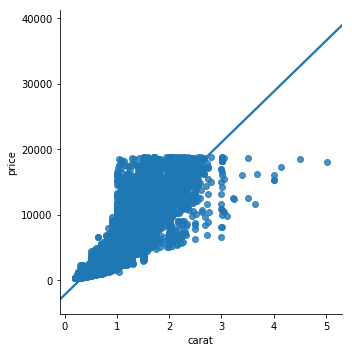

In [218]:
sns.lmplot(x='carat', y='price', data=df)

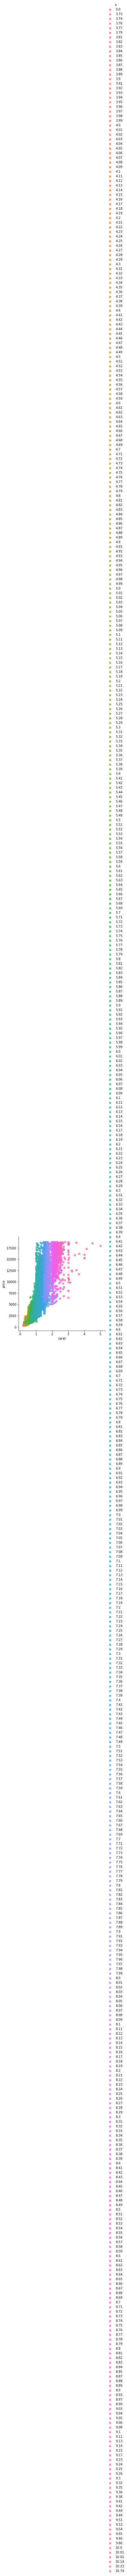

In [219]:
sns.lmplot(x='carat', y='price', data=df, 
           fit_reg=False, #remove regression line
           hue='x')

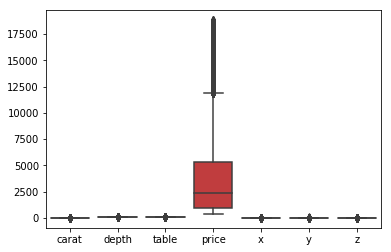

In [178]:
sns.boxplot(data=df)

In [26]:
stats_df = df.drop(['price', 'y', 'z', 'depth', 'table'], axis=1)
stats_df.head()

,carat,cut,color,clarity,x
0,0.23,Ideal,E,SI2,3.95
1,0.21,Premium,E,SI1,3.89
2,0.23,Good,E,VS1,4.05
3,0.29,Premium,I,VS2,4.20
4,0.31,Good,J,SI2,4.34


In [27]:
stats_df.head()

,carat,cut,color,clarity,x
0,0.23,Ideal,E,SI2,3.95
1,0.21,Premium,E,SI1,3.89
2,0.23,Good,E,VS1,4.05
3,0.29,Premium,I,VS2,4.20
4,0.31,Good,J,SI2,4.34


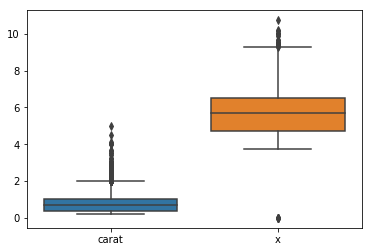

In [20]:
sns.boxplot(data=stats_df)
#sns.boxplot?

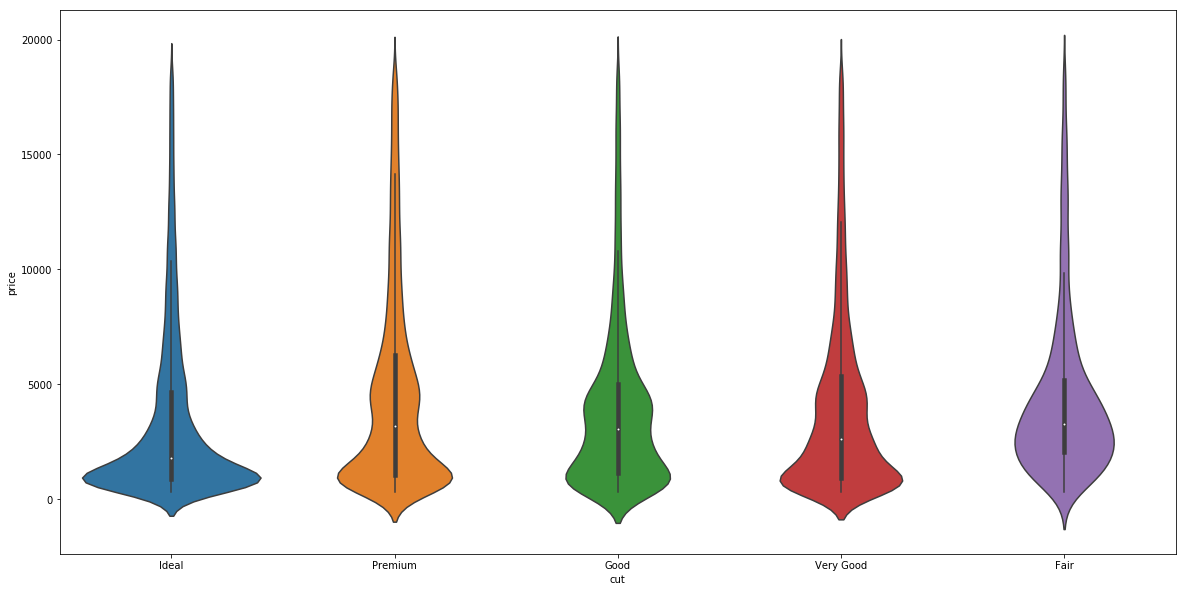

In [264]:
plt.subplots(figsize=(20,10))

sns.violinplot(x='cut', y='price', data=df)
#use cut, clarity or color for x axis for violinplot

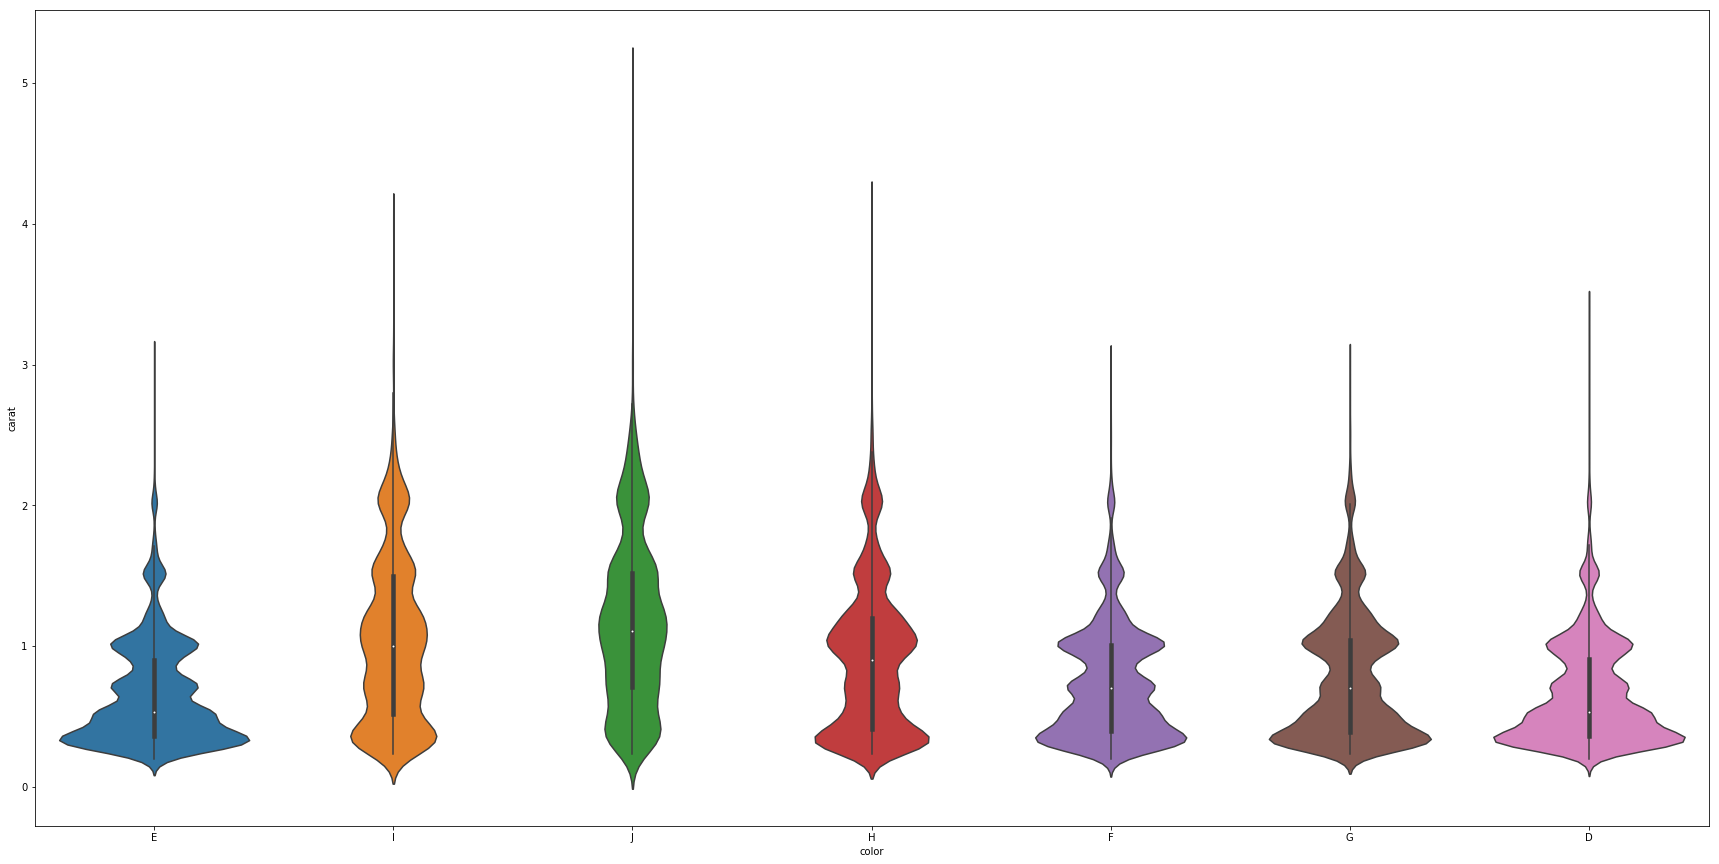

In [253]:
plt.subplots(figsize=(30,15))

sns.violinplot(x='color', y='carat', data=df)

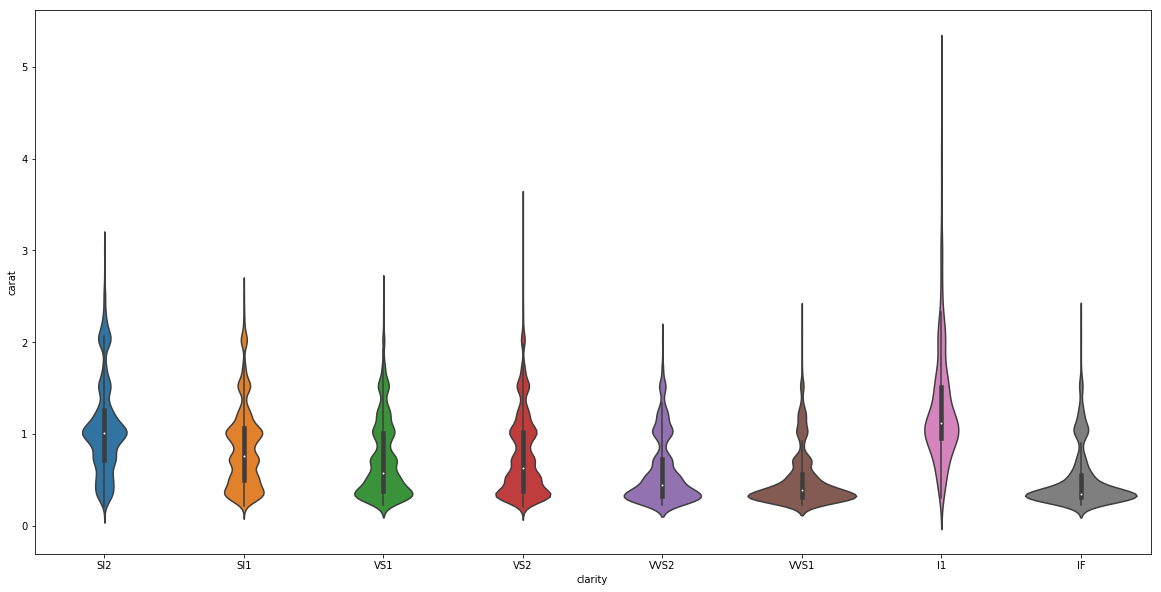

In [254]:
plt.subplots(figsize=(20,10))

sns.violinplot(x='clarity', y='carat', data=df)

In [10]:
pkmn_type_colors = ['#78C850',  # D
                    '#F08030',  # E
                    '#6890F0',  # F
                    '#A8B820',  # G
                    '#A8A878',  # H
                    '#A040A0',  # I
                    '#F8D030',  # J
                   ]

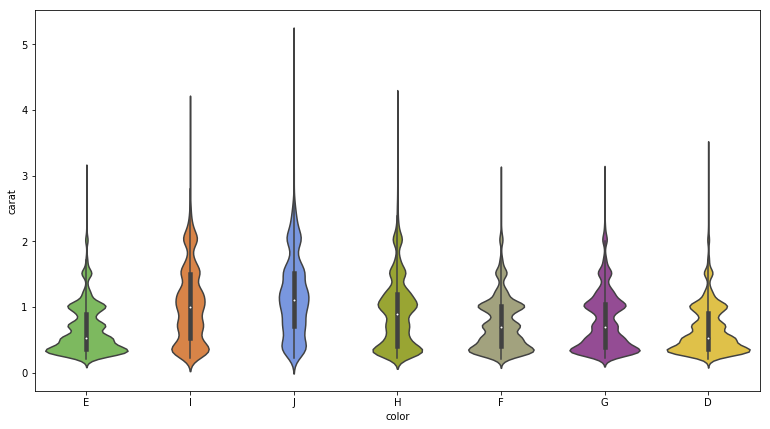

In [11]:
plt.subplots(figsize=(13,7))
sns.violinplot(x='color', y='carat', data=df, palette=pkmn_type_colors)

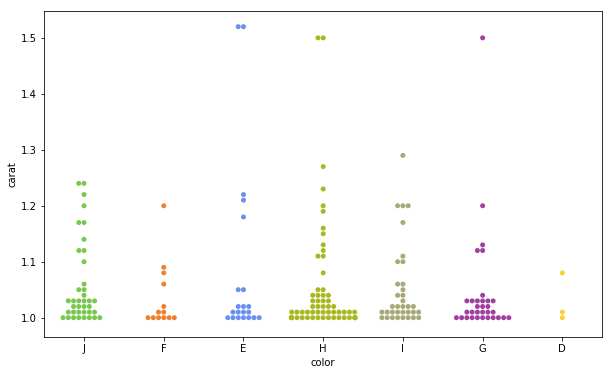

In [12]:
df.describe()

plt.subplots(figsize=(10,6))
# df2 = df.head(100)
#to display carat's based on color within the range of 1 to 5
df_carat_range = df.loc[(df['carat'] >= 1) & (df['carat'] <=5)]
df_carat_range2 = df_carat_range.head(200)
#to decrease the range and make it more clearer
sns.swarmplot(x='color', y='carat', data=df_carat_range2, palette=pkmn_type_colors)

Text(0.5, 1.0, 'Carat by Color')

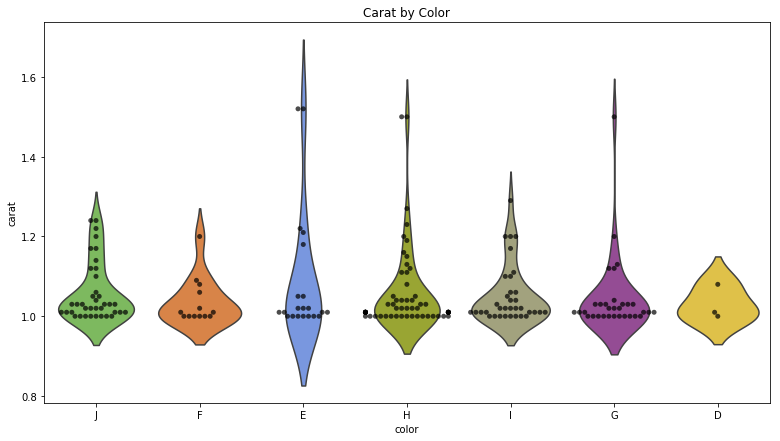

In [13]:
#combine a violin plot with a swarm plot
plt.figure(figsize=(13,7))
sns.violinplot(x='color',
               y='carat',
               data=df_carat_range2,
               inner=None, #removes bars inside violin plot
               palette=pkmn_type_colors)

sns.swarmplot(x='color',
              y='carat',
              data=df_carat_range2,
              color='k', #make points black
              alpha=0.7) #slightly transparent

plt.title('Carat by Color')

In [24]:
#melt_stats_df = pd.melt(stats_df, 
                  #id_vars=[], #column to keep
                  #var_name="Stat")
#include everything but price, so you grab those values without deleting those columns?!
#melt_stats_df.head()

#old dataframe drops columns not used before
#no need to use melt fxn

,x,clarity,color,carat,cut,Stat,value


In [29]:
print(stats_df.shape)
#print(melt_df_carat_range2.shape)

(53940, 5)


KeyboardInterrupt: 

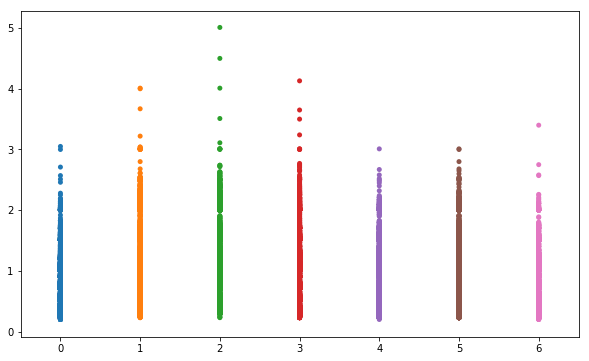

In [30]:
plt.figure(figsize=(10,6))

#swarm plot of Stats from melted dataframe
sns.swarmplot(x='color', y='carat', 
              data=stats_df,
              hue='color')

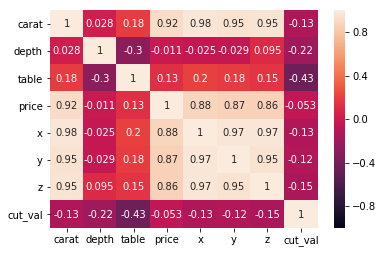

In [268]:
corr = df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

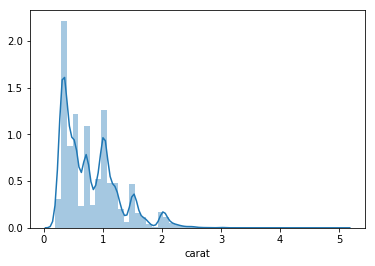

In [8]:
sns.distplot(df['carat'])

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

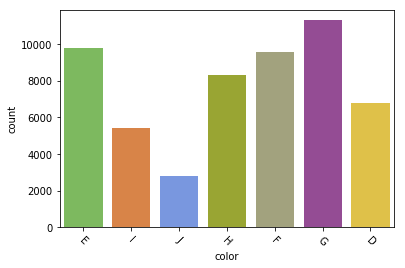

In [14]:
sns.countplot(x='color',
              data=df, 
              palette=pkmn_type_colors)

plt.xticks(rotation=-45)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


KeyboardInterrupt: 

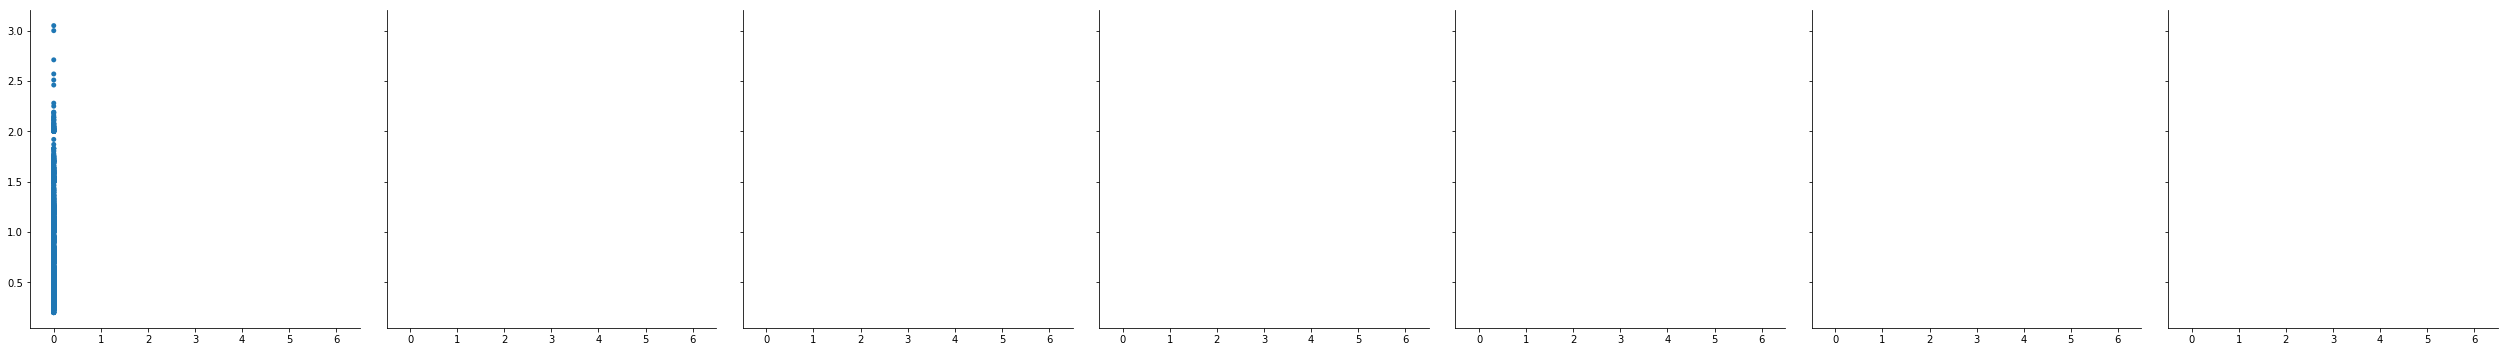

In [25]:
g = sns.factorplot(x='color', y='carat',
                   data=df,
                   hue='color', 
                   col='color',
                   kind='swarm')

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)

In [84]:
# df2 = df.drop(columns = ['cut','color','clarity'], axis=1,inplace=True)
df.head()
# df.drop?

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_val,color_val,clarity_val
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,5,6,4
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,4,6,5
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,2,6,7
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,4,2,6
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,2,1,4


In [85]:

from sklearn.linear_model import LinearRegression

X = df.drop(['price'], axis=1)
#drop the thing you are trying to predict


#sklearn linear model imports linear regression new data frame called (x, and it will contain everything but price, since that is what we want to predict, and set linear fxn to lm)to pass into model to get predicted output
#so bos dataframe is still intact, it's a copy without the price variable since the price is the dependent variable
#assign linear regression function to a variable
lm = LinearRegression()
# ^ initialize parameters here in brackets
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
# df.head()
lm.fit(X, df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 1113.132406737483


In [89]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 10


In [90]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Unnamed: 0,0.005117
1,carat,10673.940754
2,depth,-76.123529
3,table,-25.795386
4,x,-825.074186
5,y,46.327653
6,z,-28.156006
7,cut_val,119.470476
8,color_val,322.652932
9,clarity_val,499.392236


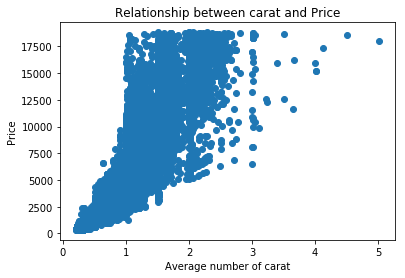

In [105]:
plt.scatter(df.carat, df.price) 
#columns for RM and price (dataframe.column name can be confusing with dataframe.function name)
#watch out for dot notation
plt.xlabel("Average number of carat") 
plt.ylabel("Price") 
plt.title("Relationship between carat and Price") 
plt.show()

In [99]:
#df.head()
lm.predict(X)[0:5] 

array([-1144.43851637,  -956.95546801,    12.59216699, -1261.49962019,
       -2790.23501009])

In [ ]:
#treat negatives as 0's

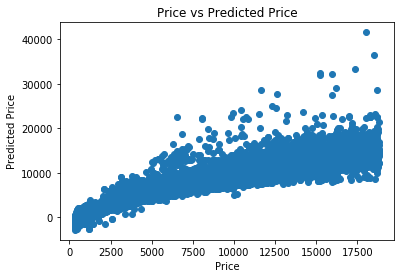

In [100]:
plt.scatter(df.price, lm.predict(X))
plt.xlabel("Price") 
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

In [101]:
mseFull = np.mean((df.price - lm.predict(X)) ** 2)
print(mseFull)

1474776.6344358749


In [102]:
#test_size default = 0.25
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df.price, test_size=0.33, random_state = 5)
#test size is 33%, normal size is 25%
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36139, 10)
(17801, 10)
(36139,)
(17801,)


In [103]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [104]:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 1477656.4204411819
Fit a model X_train, and calculate MSE with X_test, Y_test: 1469241.5234763797


In [ ]:
#test data set data aside that model has not yet seen to test data never seen 
#need numerical numbers for model linear regression
#drop alphabetical values

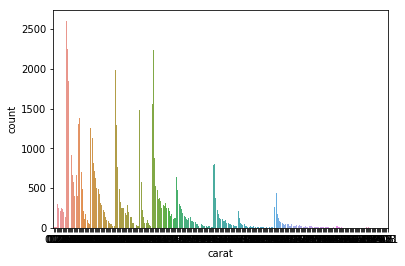

In [106]:
sns.countplot(x='carat', data=df)

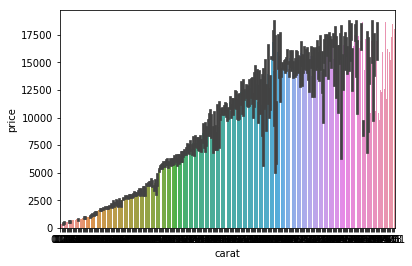

In [107]:
sns.barplot('carat', 'price', data=df)

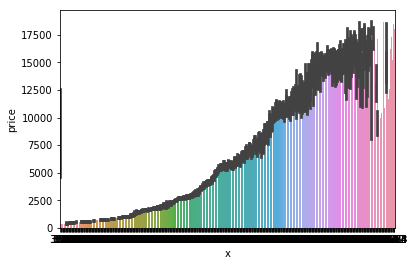

In [108]:
sns.barplot('x', 'price', data=df)

[Text(0.5, 0, 'color_val')]

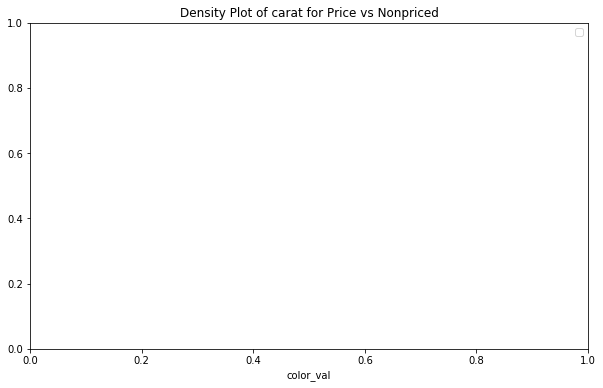

In [143]:
# plt.figure(figsize=(10,6))

# ax = sns.kdeplot(df['color_val'][df['price'] == 1], #carats based on price
#                  color="darkturquoise",
#                  shade=True)

# sns.kdeplot(df['color_val'][df['price'] == 0], #carats not based on price
#             color="lightcoral",
#             shade=True)

# plt.legend (['Price', 'Nonpriced'])
# plt.title("Density Plot of carat for Price vs Nonpriced")

# ax.set(xlabel='color_val')

In [8]:
modeldf= df.drop(['depth', 'table', 'y', 'z'], axis = 1)

In [9]:
modeldf.columns

Index(['carat', 'cut', 'color', 'clarity', 'price', 'x', 'cut_val',
       'color_val', 'clarity_val'],
      dtype='object')

In [10]:
modeldf = pd.get_dummies(data=modeldf, columns=['cut','color', 'clarity'])
modeldf.head()
#dummies categorical

,carat,price,x,cut_val,color_val,clarity_val,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,326,3.95,5,6,4,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,326,3.89,4,6,5,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,327,4.05,2,6,7,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,334,4.20,4,2,6,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,335,4.34,2,1,4,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
#Logistic Regression for categorical values

In [11]:
y=modeldf['cut_val']

In [12]:
modeldf.head()

,carat,price,x,cut_val,color_val,clarity_val,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,326,3.95,5,6,4,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,326,3.89,4,6,5,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,327,4.05,2,6,7,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,334,4.20,4,2,6,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,335,4.34,2,1,4,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [13]:
X= modeldf.drop('cut_val', axis =1)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [15]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
LogReg.score(X_train, y_train)

1.0

In [17]:
y_pred = LogReg.predict(X_test)

In [21]:
# pd.DataFrame(
#     confusion_matrix(y_test, y_pred),
#     columns=['Predicted Improper Price', 'Predicted Price'],
#     index=['True Improper Price', 'True Price']
# )

#y-test variable is 22%????????

ValueError: Shape of passed values is (5, 5), indices imply (2, 2)

In [19]:
LogReg.score(X_test, y_test)

1.0

In [20]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00       309
          2       1.00      1.00      1.00       976
          3       1.00      1.00      1.00      2464
          4       1.00      1.00      1.00      2813
          5       1.00      1.00      1.00      4226

avg / total       1.00      1.00      1.00     10788

